In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

In [3]:
bgr_img = cv2.imread("ittsp.png")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=1280, height=720, depth=3


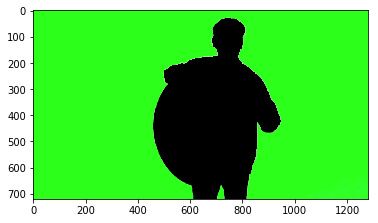

In [11]:
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
kernel = np.ones((5,5),np.uint8)  #

lowerBound = np.array([35,43,46])
upperBound = np.array([77,255,255])
#lowerBound = np.array([100,80,0])
#upperBound = np.array([255,255,255])
mask = cv2.inRange(hsv,lowerBound,upperBound);
image_result = cv2.bitwise_and(image,image,mask=mask)
plt.imshow(image_result)

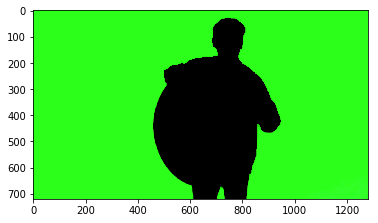

In [12]:
kernel = np.ones((9,9),np.uint8)
opening = cv2.morphologyEx(image_result, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

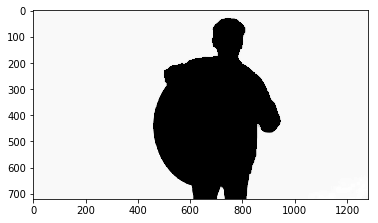

In [13]:
gray = cv2.cvtColor(opening, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

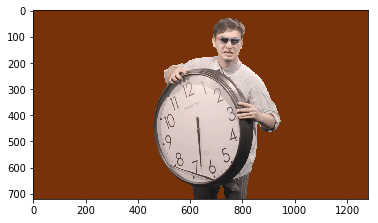

In [18]:
cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (120, 50, 10), -1)
    
plt.imshow(output)